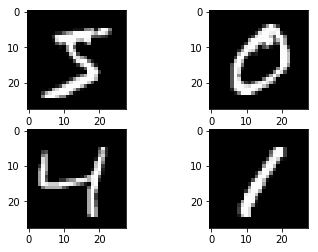

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Beginning training process...
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 126us/step - loss: 0.3377 - acc: 0.8965 - val_loss: 0.0798 - val_acc: 0.9753
Epoch 2/12
60000/60000 [==============================] - 7s 123us/step - loss: 0.1166 - acc: 0.9659 - val_loss: 0.0509 - val_acc: 0.9841
Epoch 3/12
60000/60000 [==============================] - 7s 120us/step - loss: 0.0854 - acc: 0.9750 - val_loss: 0.0441 - val_acc: 0.9849
Epoch 4/12
60000/60000 [==============================] - 7s 119us/step - loss: 0.0725 - acc: 0.9781 - val_loss: 0.0395 - val_acc: 0.9862
Epoch 5/12
60000/60000 [==============================] - 7s 120us/step - loss: 0.0630 - acc: 0.9807 - val_loss: 0.0362 - val_acc: 0.9873
Epoch 6/12
60000/60000 [==============================] - 7s 119us/step - loss: 0.0562 - acc: 0.9833 - val_loss: 0.0347 - val_acc: 0.9877
Epoch 7/12
60000/60

In [2]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
7 seconds per epoch on a MSI GeForce® GTX 1060.
'''

import warnings
warnings.filterwarnings('ignore')

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

import matplotlib.pyplot as plt
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print('Beginning training process...')

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])